In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = "https://raw.githubusercontent.com/whosphong/STAT-CONSULT---UAstat590/refs/heads/main/Measuring%20Quality%20Time%20-%20Sheet1.csv"

df = pd.read_csv(data)

In [3]:
df

,Month,Batch,AQI
0,jan94,2339,86.63
1,feb94,2275,84.60
2,mar94,2881,87.04
3,apr94,2780,87.19
4,may94,3227,87.91
5,jun94,3291,87.99
6,jul94,2944,88.09
7,aug94,3163,88.25
8,sep94,2770,87.62
9,oct94,2827,87.43


In [13]:
df['Month'] = pd.to_datetime(df['Month'], format='%b%y')

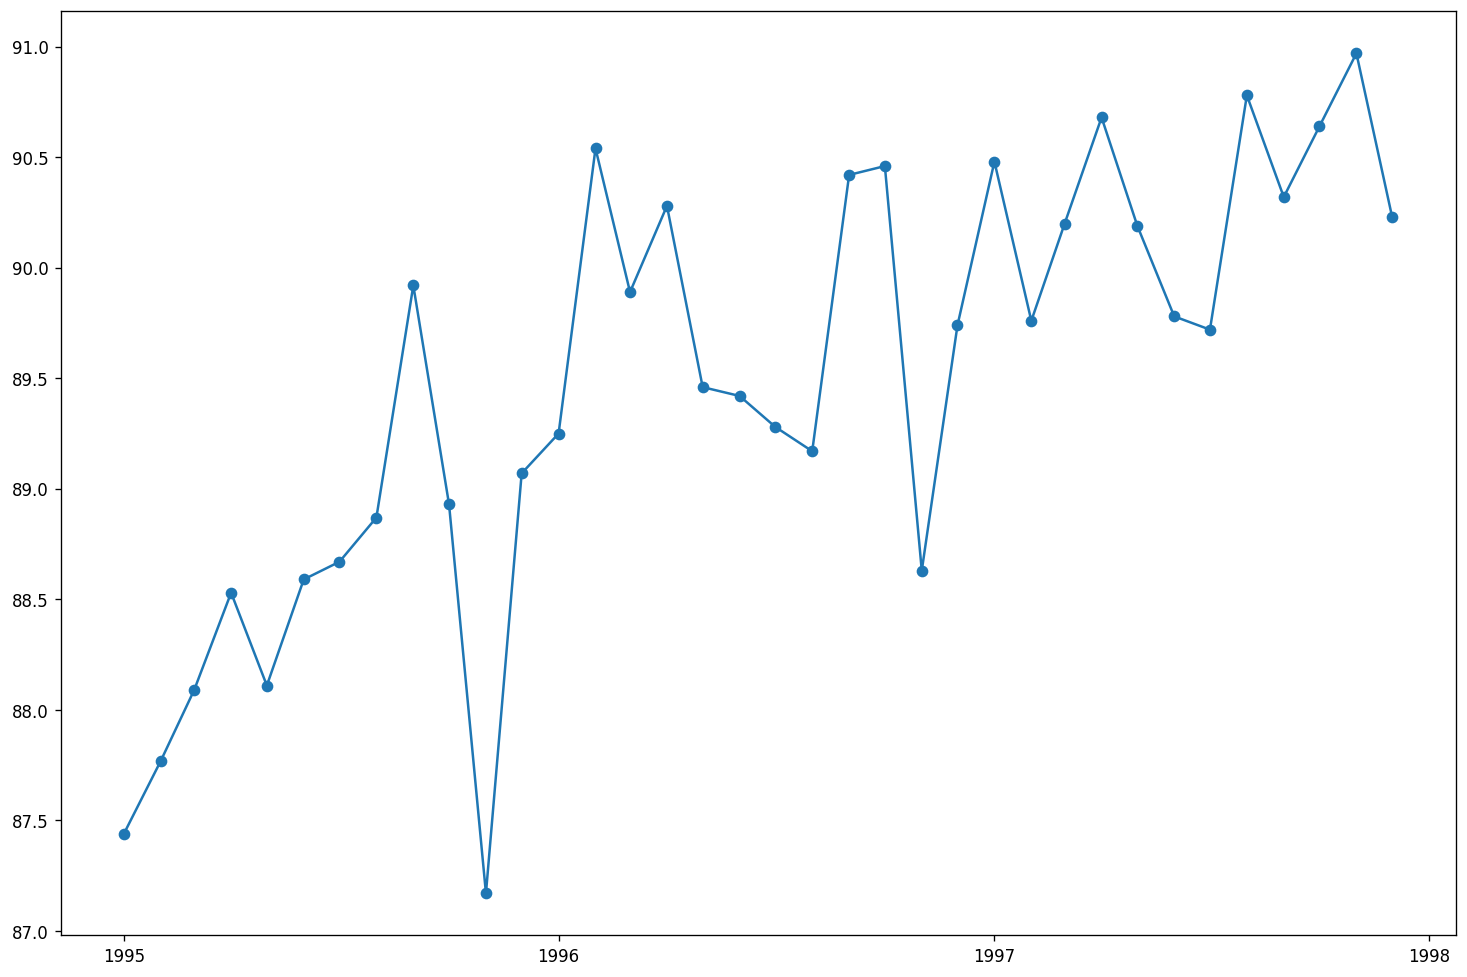

In [86]:
plt.plot(df['Month'], df['AQI'], marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

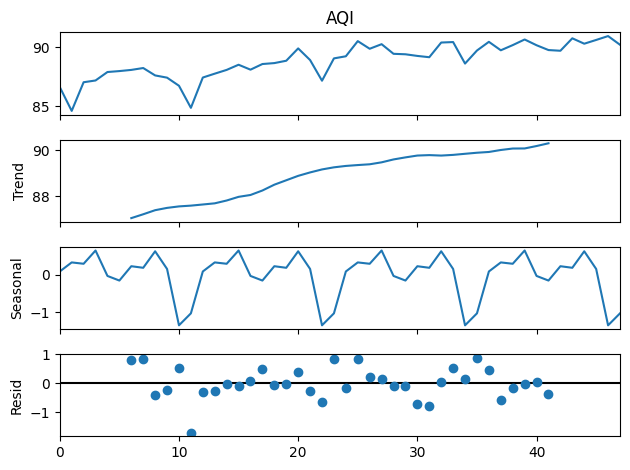

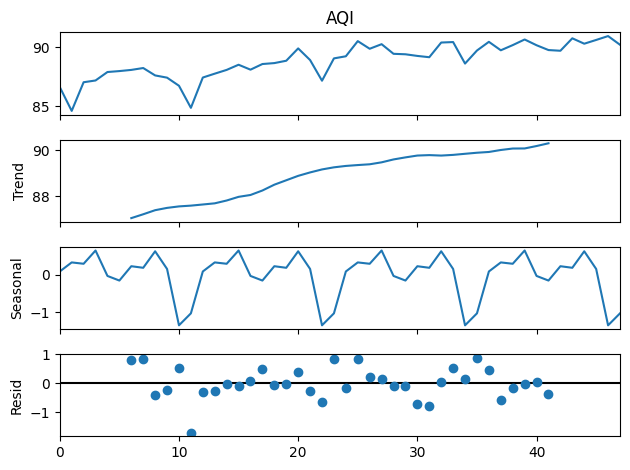

In [15]:
result = seasonal_decompose(df['AQI'], model='additive', period=12)

# Plot the decomposition components
result.plot()


## Yearly seasonality is observed in the data

In [4]:
df['AQI_diff'] = df['AQI'].diff()

# Square root transformation
df['AQI_sqrt'] = np.sqrt(df['AQI'])
df['AQI_sqrt_diff'] = df['AQI_sqrt'].diff()

# Logarithmic transformation
df['AQI_log'] = np.log(df['AQI'])
df['AQI_logdiff'] = df['AQI_log'].diff()

# Perform Box-Cox transformation
df['AQI_boxcox'], lam = boxcox(df['AQI'])
df['AQI_boxcox_diff'] = df['AQI_boxcox'].diff()


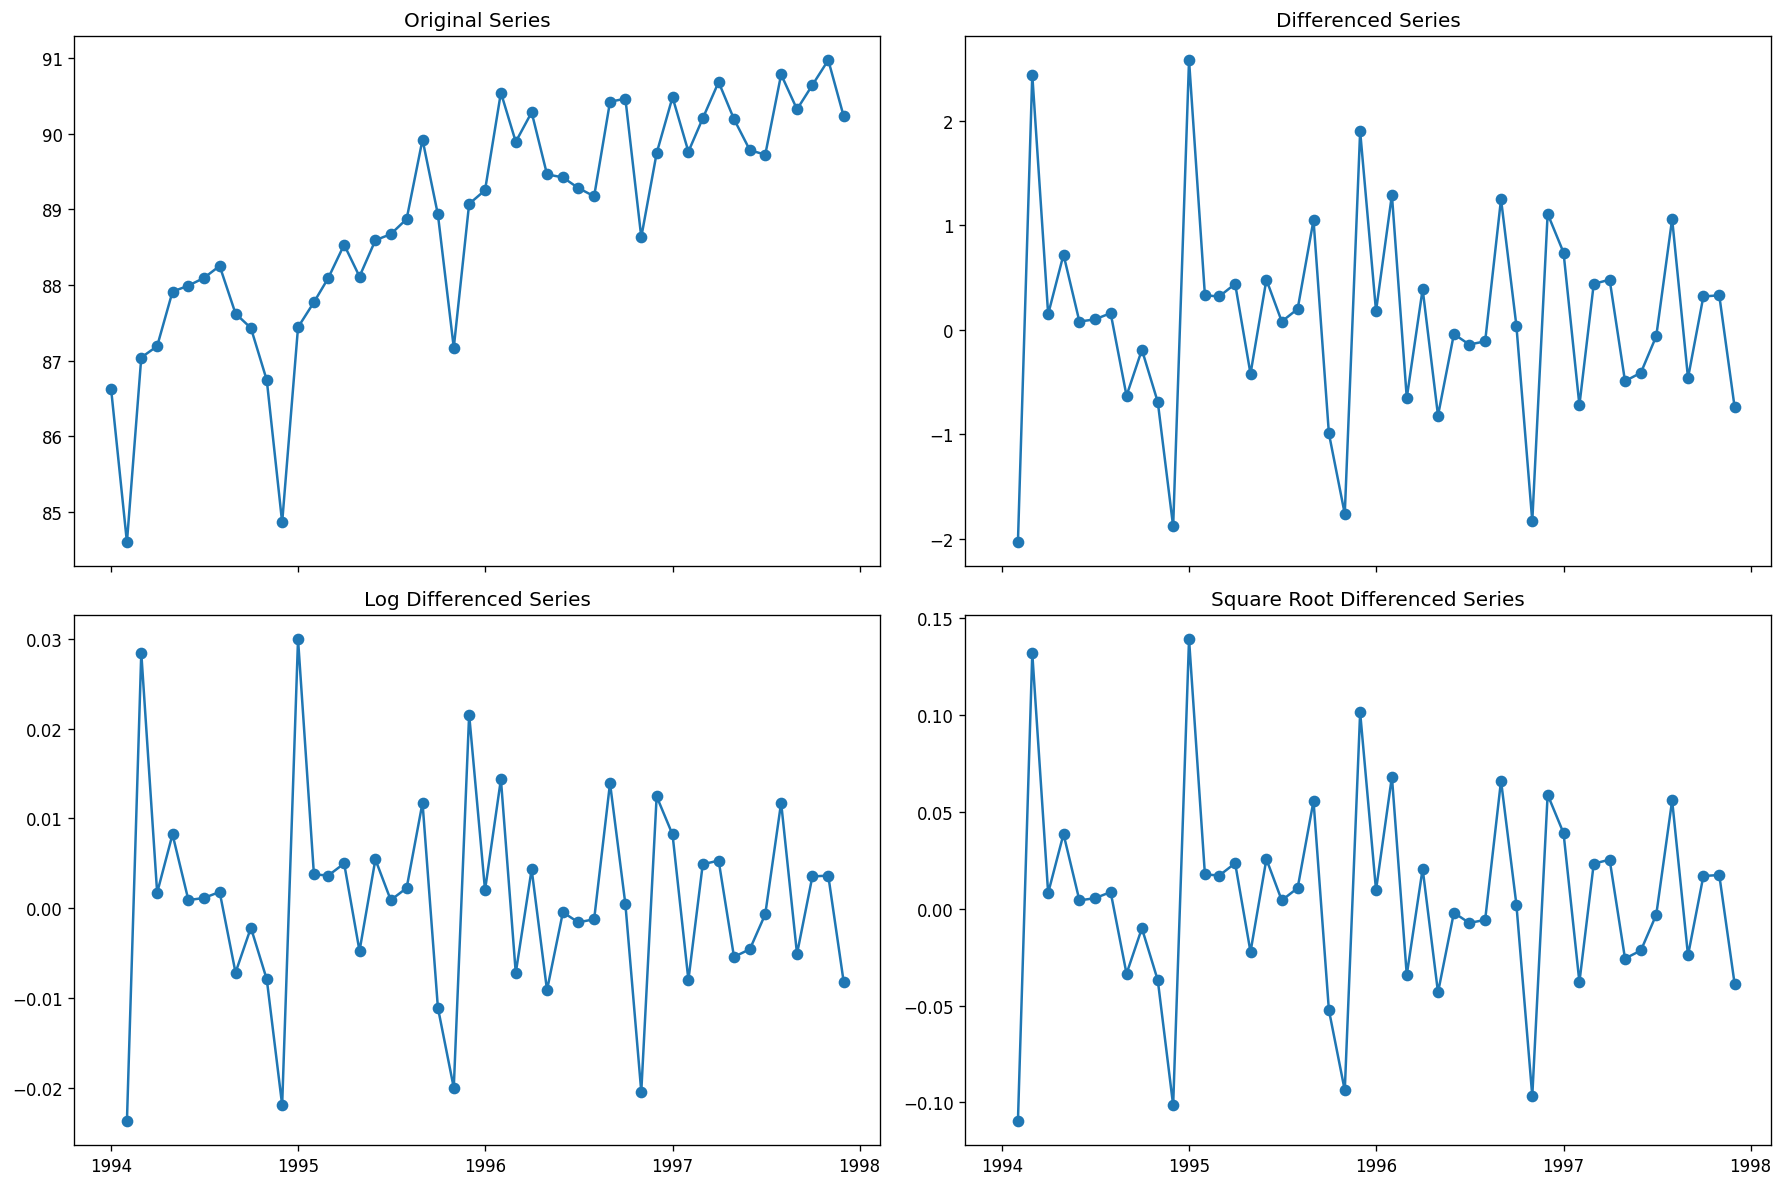

In [52]:
plt.rcParams.update({'figure.figsize':(15, 10), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=True)

# Original Series
axes[0, 0].plot(df['Month'], df['AQI'], marker='o')
axes[0, 0].set_title('Original Series')

# Differenced Series
axes[0, 1].plot(df['Month'], df['AQI_diff'], marker='o')
axes[0, 1].set_title('Differenced Series')

# Log Differenced Series
axes[1, 0].plot(df['Month'], df['AQI_logdiff'], marker='o')
axes[1, 0].set_title('Log Differenced Series')

# Square Root Differenced Series
axes[1, 1].plot(df['Month'], df['AQI_sqrt_diff'], marker='o')
axes[1, 1].set_title('Square Root Differenced Series')

# Format the x-axis to show only the year
for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()

In [38]:
# ADF test
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))

adf_test(df["AQI"][1:]) ## Non-stationary
adf_test(df["AQI_logdiff"][1:])
adf_test(df["AQI_diff"][1:]) ## Both are stationary but non-log difference slightly better
adf_test(df["AQI_boxcox_diff"][1:]) ## Boxcox difference is also stationary
adf_test(df["AQI_sqrt_diff"][1:]) ## Sqrt difference is also stationary

ADF Statistic:  -1.8071834692874724
P-Value:  0.3769011778347343
Critical Values:
	1%: -3.59
	5%: -2.93
	10%: -2.60
ADF Statistic:  -4.5285091842065315
P-Value:  0.0001745859857949204
Critical Values:
	1%: -3.60
	5%: -2.93
	10%: -2.60
ADF Statistic:  -4.547497242284982
P-Value:  0.00016122637260600683
Critical Values:
	1%: -3.60
	5%: -2.93
	10%: -2.60
ADF Statistic:  -7.22459115086906
P-Value:  2.0688702354490403e-10
Critical Values:
	1%: -3.58
	5%: -2.93
	10%: -2.60
ADF Statistic:  -4.537918073446383
P-Value:  0.00016783948686077183
Critical Values:
	1%: -3.60
	5%: -2.93
	10%: -2.60


# Fitting Original

No differencing, no transformation

In [6]:
from statsmodels.tsa.arima.model import ARIMA

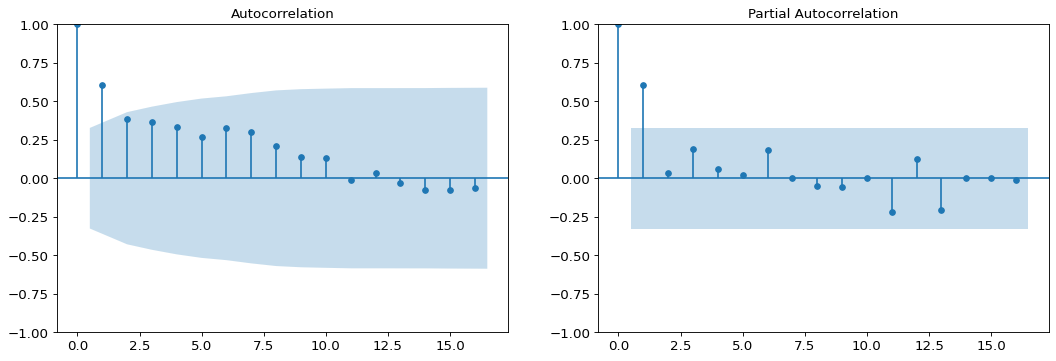

In [65]:
# Drop NA values
df.dropna(inplace=True)

# Plot acf and pacf for log differenced series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), dpi=80)
plot_acf(df['AQI'], ax=ax1)
plot_pacf(df['AQI'], method='ywm', ax=ax2)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()


                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                   38
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -53.094
Date:                Wed, 19 Feb 2025   AIC                            114.189
Time:                        23:21:47   BIC                            120.739
Sample:                             0   HQIC                           116.519
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.3682      0.838    105.430      0.000      86.725      90.011
ar.L1          0.8846      0.127      6.975      0.000       0.636       1.133
ma.L1         -0.3318      0.252     -1.314      0.1

d:\anaconda3\envs\dsci\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


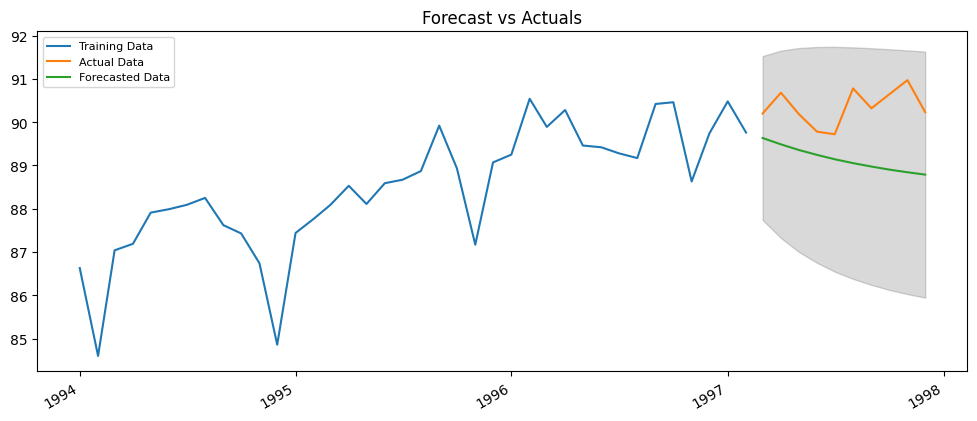

ADF Statistic:  -4.547497242284982
P-Value:  0.00016122637260600683
Critical Values:
	1%: -3.60
	5%: -2.93
	10%: -2.60
None


In [49]:
def forecast_arima(data, column='AQI', order=(1, 0, 1), dif = 0, train_ratio=0.8):
    # Split the data into train and test
    train_size = int(len(data) * train_ratio)
    train = data.iloc[:train_size]
    test = data.iloc[train_size:]
    
    # Build ARIMA model
    model = ARIMA(train[column], order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    
    # Forecast the next values (size of test set)
    forecast_results = model_fit.get_forecast(steps=len(test), alpha=0.05)  # 95% conf
    
    # Access the forecasted values, standard errors, and confidence intervals
    fc = forecast_results.predicted_mean  # Forecast values
    se = forecast_results.se_mean  # Standard errors
    conf = forecast_results.conf_int()  # Confidence intervals
    
    # Make the forecasts into pandas series with the same index as the test set
    fc_series = pd.Series(fc, index=test.index)  # Adjust the index to match the forecast period
    lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
    upper_series = pd.Series(conf.iloc[:, 1], index=test.index)
    
    # Plot the training, test, and forecasted data
    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(train['Month'], train[column], label='Training Data')
    plt.plot(test['Month'], test[column], label='Actual Data')
    plt.plot(test['Month'], fc_series, label='Forecasted Data')
    plt.fill_between(test['Month'], lower_series, upper_series, color='k', alpha=0.15)  # Confidence interval
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    
    # Set the date formatting for x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Shows only the year
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Place a tick every year
    
    # Auto format the x-axis labels so that they don't overlap
    plt.gcf().autofmt_xdate()
    
    plt.show()
    print(adf_test(df[column].diff(dif)[dif:]))

# Example usage
forecast_arima(df, column='AQI', order=(1, 0, 1), dif=1)


                               SARIMAX Results                                
Dep. Variable:                AQI_log   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 114.208
Date:                Wed, 19 Feb 2025   AIC                           -222.416
Time:                        23:22:02   BIC                           -217.584
Sample:                             0   HQIC                          -220.713
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2764      0.285      0.969      0.332      -0.283       0.835
ma.L1         -0.7179      0.265     -2.712      0.007      -1.237      -0.199
sigma2         0.0001   3.21e-05      3.759      0.0

d:\anaconda3\envs\dsci\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


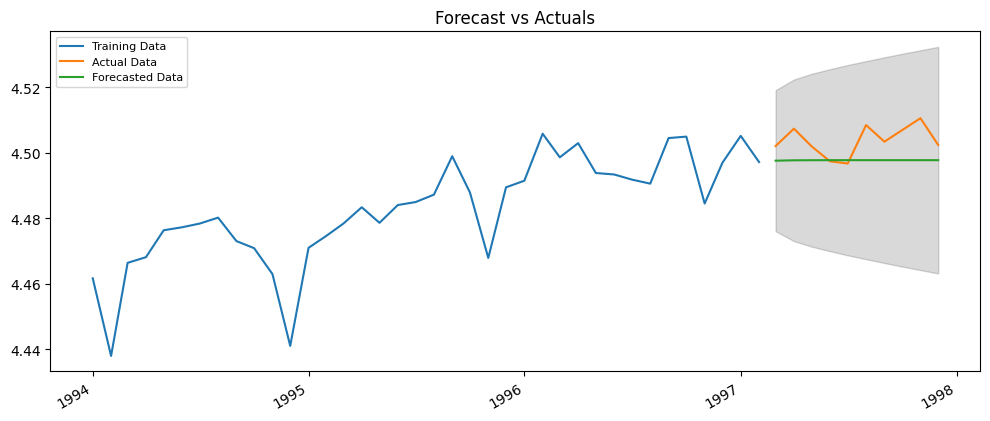

ADF Statistic:  -4.5285091842065315
P-Value:  0.0001745859857949204
Critical Values:
	1%: -3.60
	5%: -2.93
	10%: -2.60
None


In [51]:
forecast_arima(df, column='AQI_log', order=(1, 1, 1), dif=1)